In [1]:
#načtění datasetu
import pandas as pd 

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [4]:
#knihovna, která nabízí velké možnosti zobrazení
import seaborn as sns

In [5]:
from nltk.stem import WordNetLemmatizer
import folium

In [6]:
pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth

Requirement already up-to-date: google-cloud-language in /Users/annanguyen/.local/lib/python3.8/site-packages (2.0.0)
Requirement already up-to-date: google-cloud in /Users/annanguyen/.local/lib/python3.8/site-packages (0.34.0)
Requirement already up-to-date: google-cloud-vision in /Users/annanguyen/.local/lib/python3.8/site-packages (2.0.0)
Requirement already up-to-date: google-oauth in /Users/annanguyen/.local/lib/python3.8/site-packages (1.0.1)
Note: you may need to restart the kernel to use updated packages.


In [7]:
#načtení dalších knihoven
from google.cloud import language_v1
from google.oauth2 import service_account

In [8]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [9]:
client = language_v1.LanguageServiceClient(credentials=creds)

In [10]:
df = pd.read_csv("Hotel_Reviews.csv", 
                 index_col=False, 
                 usecols=['Positive_Review', 'Negative_Review'], 
                 dtype={'text':"string"})

In [11]:
df.head(4)

Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   

                                     Positive_Review  
0   Only the park outside of the hotel was beauti...  
1   No real complaints the hotel was great great ...  
2   Location was good and staff were ok It is cut...  
3   Great location in nice surroundings the bar a...

In [12]:
#Vytvoření sloupce Review
df['Review'] = df['Positive_Review'] + df['Negative_Review']
df["Review"]

0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4          Amazing location and building Romantic settin...
                                ...                        
515733     location no trolly or staff to help you take ...
515734     Breakfast was ok and we got earlier check in ...
515735    No Positive The ac was useless It was a hot we...
515736     The rooms are enormous and really comfortable...
515737     staff was very kind  I was in 3rd floor It di...
Name: Review, Length: 515738, dtype: object

###--------- Analyza entity test --------- 

In [13]:
def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [14]:
#Hromadné zpracování dat ze souborů
text_content = df['Review'].values[0]
print(text_content)

 Only the park outside of the hotel was beautiful  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to ge

In [15]:
response = analyze_entity(text_content)

In [16]:
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: place - Typ entity: OTHER - Skóre: 0.11131781339645386
Název entity: window - Typ entity: OTHER - Skóre: 0.07130507379770279
Název entity: booking com - Typ entity: OTHER - Skóre: 0.04605642706155777
Název entity: hotel - Typ entity: LOCATION - Skóre: 0.043490372598171234
Název entity: no one - Typ entity: PERSON - Skóre: 0.03702576085925102
Název entity: park - Typ entity: LOCATION - Skóre: 0.03678303584456444
Název entity: trips - Typ entity: EVENT - Skóre: 0.03257657587528229
Název entity: sites - Typ entity: LOCATION - Skóre: 0.03257657587528229
Název entity: booking - Typ entity: OTHER - Skóre: 0.03257657587528229
Název entity: post - Typ entity: WORK_OF_ART - Skóre: 0.03257657587528229
Název entity: fridge - Typ entity: CONSUMER_GOOD - Skóre: 0.03110254928469658
Název entity: window - Typ entity: OTHER - Skóre: 0.026557087898254395
Název entity: mistake - Typ entity: OTHER - Skóre: 0.02585029974579811
Název entity: room - Typ entity: LOCATION - Skóre: 0.025103021413

In [17]:
#Vypsání seznamu míst
for entity in response.entities:
    if language_v1.Entity.Type(entity.type_).name == 'LOCATION':
        print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
            entity.name,
            language_v1.Entity.Type(entity.type_).name,
            entity.salience))

Název entity: hotel - Typ entity: LOCATION - Skóre: 0.043490372598171234
Název entity: park - Typ entity: LOCATION - Skóre: 0.03678303584456444
Název entity: sites - Typ entity: LOCATION - Skóre: 0.03257657587528229
Název entity: room - Typ entity: LOCATION - Skóre: 0.025103021413087845
Název entity: room - Typ entity: LOCATION - Skóre: 0.023048635572195053
Název entity: level duplex room - Typ entity: LOCATION - Skóre: 0.023048635572195053
Název entity: room - Typ entity: LOCATION - Skóre: 0.018499605357646942
Název entity: room - Typ entity: LOCATION - Skóre: 0.01761655882000923
Název entity: hotel - Typ entity: LOCATION - Skóre: 0.016618063673377037
Název entity: hotel - Typ entity: LOCATION - Skóre: 0.016618063673377037
Název entity: room - Typ entity: LOCATION - Skóre: 0.015779785811901093
Název entity: room - Typ entity: LOCATION - Skóre: 0.015398189425468445
Název entity: room - Typ entity: LOCATION - Skóre: 0.014483848586678505
Název entity: room - Typ entity: LOCATION - Skóre:

In [18]:
###--------- Analyza sentimentu test --------- 

In [19]:
#Analýza sentimentu
language = "en"
type_ = language_v1.Document.Type.PLAIN_TEXT
encoding_type = language_v1.EncodingType.UTF8
document = {"content": text_content, "type_": type_, "language": language}

In [20]:
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})

In [21]:
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))

Overall Sentiment: score of -0.699999988079071 with magnitude of 1.399999976158142


In [22]:
###--------- Vizualizace --------- 

In [12]:
df = pd.read_csv("./Hotel_Reviews.csv")

In [13]:
#data size
df.shape

(515738, 17)

In [14]:
#pocet hotelu v datasetu
print(df.Hotel_Name.nunique(), 'hotels in the dataset')

1492 hotels in the dataset


<AxesSubplot:title={'center':'Počet hotelů ve statech'}>

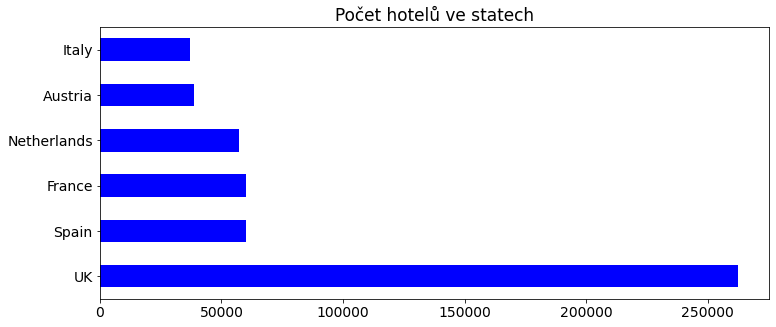

In [15]:
#graf počet hotelů ve statech
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['State'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])

plt.figure(figsize = (12,5))
plt.title('Počet hotelů ve statech', fontsize=17)
df.State.value_counts().plot.barh(color = 'blue', fontsize=14)

<AxesSubplot:xlabel='Average_Score', ylabel='count'>

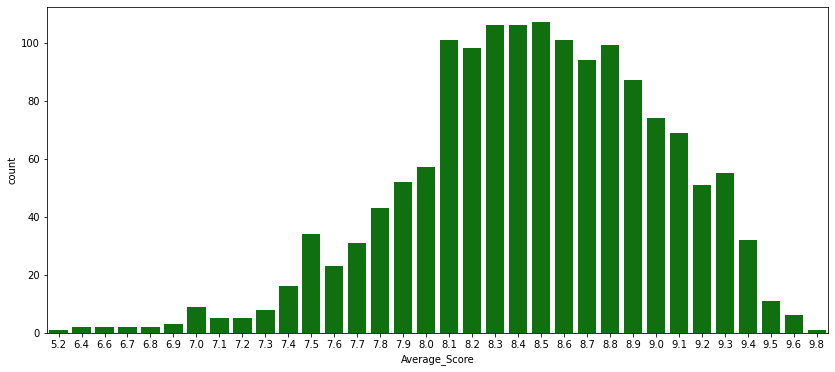

In [16]:
# Průměrná hodnocení hotelů
df_sd = df[['Hotel_Name','Average_Score']].drop_duplicates() 
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df_sd,color = 'green')

In [17]:
#top 10 Reviewer's národnosti
df.Reviewer_Nationality.describe()
Reviewer_Nat_Count = df.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
Name: Reviewer_Nationality, dtype: int64


Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Name: Hotel_Name, dtype: int64


<AxesSubplot:>

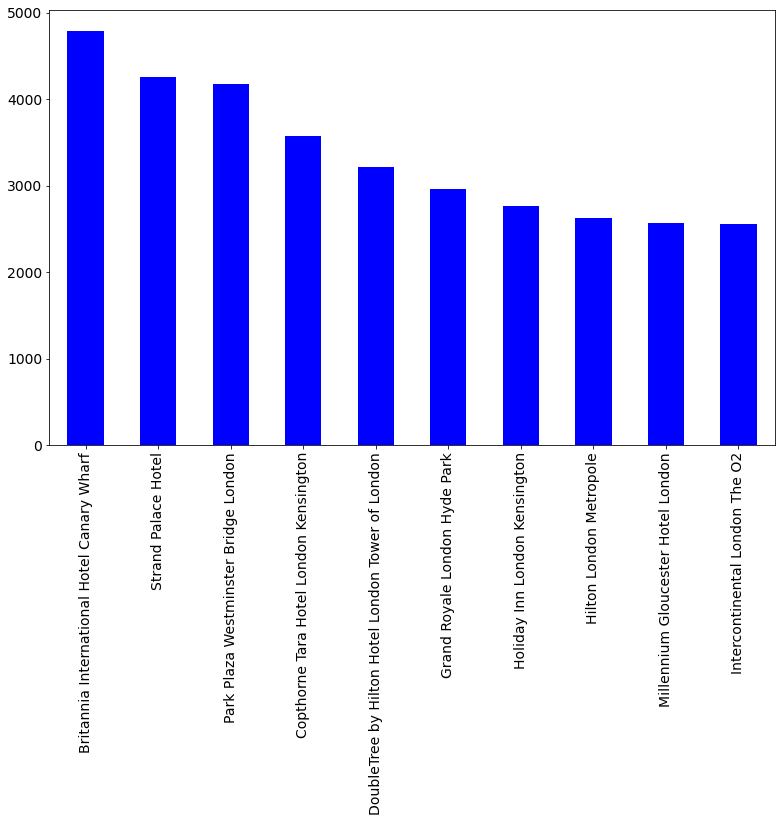

In [18]:
# 10 nejvíce hodnocených hotelů
df.Hotel_Name.describe()
Most_Rev_Count = df.Hotel_Name.value_counts()
print(Most_Rev_Count[:10])

Hotel_Name_count = df.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(13,8), color = 'blue',fontsize=14)

(2.5, 10.0, 8.395076569886239)

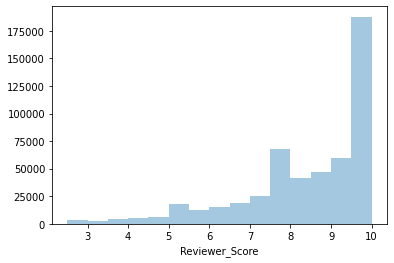

In [24]:
# Kontingenční tabulka - Reviewe_Score četnost udělených bodů
sns.distplot(df['Reviewer_Score'],kde=False,bins=15)
df['Reviewer_Score'].min() , df['Reviewer_Score'].max(), df['Reviewer_Score'].mean()

In [25]:
# Kontingenční tabulka - průměrné/minimální/maximmální hodnocení pro daný hotel 
pd.pivot_table(df,
              values="Reviewer_Score",
              aggfunc=["mean","min","max"],
              index="Hotel_Name",
              margins=True)

mean            min  \
                                   Reviewer_Score Reviewer_Score   
Hotel_Name                                                         
11 Cadogan Gardens                       8.845283            4.2   
1K Hotel                                 7.861486            3.8   
25hours Hotel beim MuseumsQuartier       8.983309            2.5   
41                                       9.711650            6.7   
45 Park Lane Dorchester Collection       9.603571            8.3   
...                                           ...            ...   
citizenM London Shoreditch               9.092005            2.5   
citizenM Tower of London                 9.135591            3.0   
every hotel Piccadilly                   8.967782            3.3   
pentahotel Vienna                        8.363566            2.9   
All                                      8.395077            2.5   

                                              max  
                                   Reviewer_Score  
Hotel_Name                                         
11 Cadogan Gardens                           10.0  
1K Hotel                                     10.0  
25hours Hotel beim MuseumsQuartier           10.0  
41                                           10.0  
45 Park Lane Dorchester Collection           10.0  
...                                           ...  
citizenM London Shoreditch                   10.0  
citizenM Tower of London                     10.0  
every hotel Piccadilly                       10.0  
pentahotel Vienna                            10.0  
All                                          10.0  

[1493 rows x 3 columns]

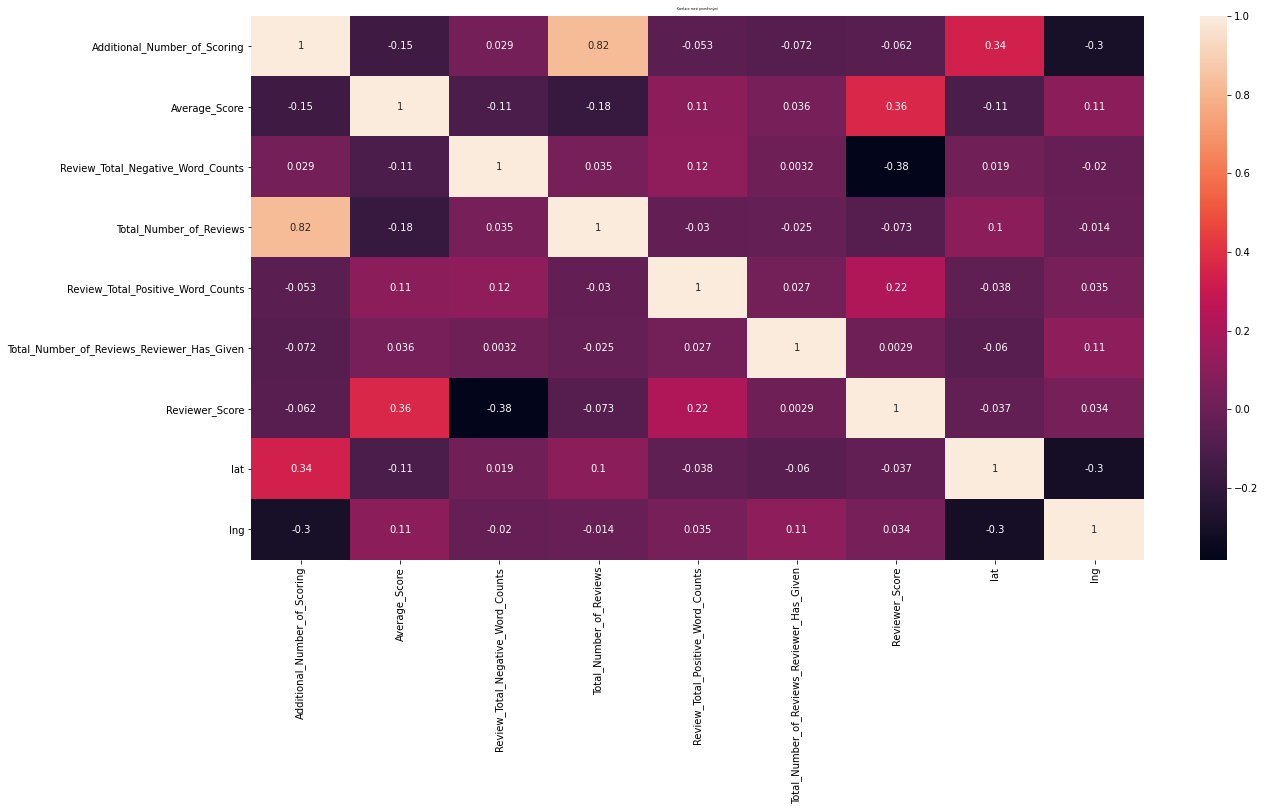

In [31]:
# Korelační matice 
df_corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot = True)
plt.title("Korelace mezi proměnnými", fontsize = 3)
plt.show()

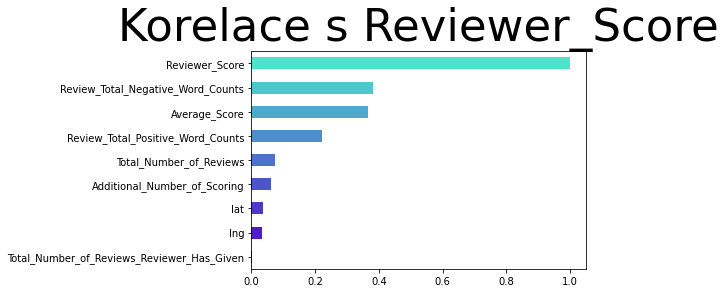

In [32]:
#vzhledem k počtu proměnných v reprezentaci korelace reprezentujeme pouze korelaci s reviewer_score
colors = []
fontsize = 15
dim = df_corr.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,r,0.8))

# převedení na pozitivní hodnoty
df_corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh(color = colors)
plt.title("Korelace s Reviewer_Score", fontsize = 45)
plt.show()


In [33]:
# Nejlépe hodnocené hotely dle statu
def country_ident(st):
    last = st.split()[-1]
    if last == "Kingdom": return "United Kingdom"
    else: return last
    
df["Hotel_Country"] = df["Hotel_Address"].apply(country_ident)
df.groupby("Hotel_Country").mean()["Reviewer_Score"].sort_values(ascending=False)

Hotel_Country
Spain          8.554092
Austria        8.545047
Netherlands    8.456311
France         8.420081
Italy          8.346722
UK             8.324138
Name: Reviewer_Score, dtype: float64

In [34]:
#nejvyšší Average_Score hotelů
df.Hotel_Address = df.Hotel_Address.str.replace('AA', 'Amsterdam' )
df['City'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-5])

df[df.Average_Score >= 8][['Hotel_Name','City','State', 'Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name     City    State  Average_Score  \
54717                            Ritz Paris      1st   France            9.8   
185602                                   41  Borough       UK            9.6   
14708                       Haymarket Hotel  Borough       UK            9.6   
402244                H10 Casa Mimosa 4 Sup      179    Spain            9.6   
398945                     Hotel The Serras   Ciutat    Spain            9.6   
316447                    Hotel Casa Camper   Ciutat    Spain            9.6   
176997  H tel de La Tamise Esprit de France      1st   France            9.6   
53756                Charlotte Street Hotel  Borough       UK            9.5   
403998                    Hotel Sacher Wien   Innere  Austria            9.5   
390999                       Ham Yard Hotel  Borough       UK            9.5   

        Total_Number_of_Reviews  
54717                       122  
185602                      244  
14708                       255  
402244                      454  
398945                      604  
316447                      732  
176997                      166  
53756                       319  
403998                      632  
390999                      314

In [35]:
#Nejnižší Average_Score hotelů
df.Hotel_Address = df.Hotel_Address.str.replace('AA', 'Amsterdam' )
df['City'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-5])

df[df.Average_Score >= 0][['Hotel_Name','City','State', 'Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = True)[:10]

Hotel_Name       City        State  \
494791                                 Hotel Liberty       City        Italy   
242324                               Hotel Cavendish     Camden           UK   
323302                         Savoy Hotel Amsterdam       Zuid  Netherlands   
157843      Best Western Maitrise Hotel Edgware Road    Borough           UK   
129781                             The Tophams Hotel    Borough           UK   
485009                  Ibis Styles Milano Palmanova  Palmanova        Italy   
204614                               Commodore Hotel    Borough           UK   
68936                                  Villa Eugenie       17th       France   
130789                       Bloomsbury Palace Hotel     Camden           UK   
375953  Hallmark Hotel London Chigwell Prince Regent       Road           UK   

        Average_Score  Total_Number_of_Reviews  
494791            5.2                      465  
242324            6.4                     2275  
323302            6.4                      995  
157843            6.6                      461  
129781            6.6                      411  
485009            6.7                      207  
204614            6.7                     2400  
68936             6.8                      165  
130789            6.8                     2751  
375953            6.9                      747

In [50]:
# Zobrazení top 10 hotelů v každé destinaci s ohledem na minimální počet recenzí 2000 - UK
df[(df.Total_Number_of_Reviews >= 2000.0) &(df.State == 'UK')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
147504       Shangri La Hotel at The Shard London            9.4   
14829              Intercontinental London The O2            9.4   
85479                      Hilton London Bankside            9.3   
971                       Apex Temple Court Hotel            9.2   
180550                   citizenM Tower of London            9.1   
100530                            Mondrian London            9.1   
96177                    citizenM London Bankside            9.1   
219221                 citizenM London Shoreditch            9.1   
57597   M by Montcalm Shoreditch London Tech City            9.1   
228012             The Piccadilly London West End            9.0   

        Total_Number_of_Reviews  
147504                     2200  
14829                      4204  
85479                      2319  
971                        2619  
180550                     4672  
100530                     3611  
96177                      3802  
219221                     2113  
57597                      4802  
228012                     2298

In [49]:
# Zobrazení top 10 hotelů v každé destinaci s ohledem na minimální počet recenzí 2000 - Spain
df[(df.Total_Number_of_Reviews >= 2000.0) &(df.State == 'Spain')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
414395                             Olivia Plaza Hotel            9.3   
331422              Catalonia Passeig de Gr cia 4 Sup            9.2   
293560                       Hotel Barcelona Catedral            8.9   
432148                        Negresco Princess 4 Sup            8.9   
335562                                Pol Grace Hotel            8.8   
327773                            Ayre Hotel Gran V a            8.8   
439332                      Capri by Fraser Barcelona            8.8   
426562                                 Catalonia Born            8.8   
292450  TWO Hotel Barcelona by Axel 4 Sup Adults Only            8.8   
434967                            Ayre Hotel Rosell n            8.7   

        Total_Number_of_Reviews  
414395                     2757  
331422                     2116  
293560                     2695  
432148                     2369  
335562                     2220  
327773                     4887  
439332                     2988  
426562                     2094  
292450                     2336  
434967                     2359

In [51]:
# Zobrazení top 10 hotelů v každé destinaci s ohledem na minimální počet recenzí 2000 - France
df[(df.Total_Number_of_Reviews >= 2000.0) &(df.State == 'France')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
159493            Hotel Saint Petersbourg Opera            8.9   
76390                 Pullman Paris Tour Eiffel            8.6   
90316                Novotel Paris Gare De Lyon            8.5   
249541                 Novotel Paris Les Halles            8.4   
33131   Holiday Inn Paris Gare de Lyon Bastille            8.3   
209551        Oceania Paris Porte De Versailles            8.2   
99600          Mercure Paris Centre Tour Eiffel            8.0   
102541       Saint James Albany Paris Hotel Spa            8.0   
89127            Mercure Paris Gare De Lyon TGV            7.9   
179767              H tel Concorde Montparnasse            7.9   

        Total_Number_of_Reviews  
159493                     2412  
76390                      2764  
90316                      3583  
249541                     2398  
33131                      2200  
209551                     2541  
99600                      2611  
102541                     2868  
89127                      2903  
179767                     2515

In [52]:
# Zobrazení top 10 hotelů v každé destinaci s ohledem na minimální počet recenzí 2000 - Netherlands
df[(df.Total_Number_of_Reviews >= 2000.0) &(df.State == 'Netherlands')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
450210                           Hotel Esther a            9.1   
418909                       art otel Amsterdam            9.0   
323545                    Hotel Okura Amsterdam            8.9   
386209  INK Hotel Amsterdam MGallery by Sofitel            8.9   
309843                            Jaz Amsterdam            8.9   
347200                         Room Mate Aitana            8.8   
509232         The Student Hotel Amsterdam City            8.7   
311000       Best Western Premier Hotel Couture            8.7   
338980         WestCord Fashion Hotel Amsterdam            8.7   
382857     Mercure Amsterdam Sloterdijk Station            8.6   

        Total_Number_of_Reviews  
450210                     4687  
418909                     3158  
323545                     2295  
386209                     2574  
309843                     7108  
347200                     4097  
509232                     7656  
311000                     8177  
338980                     5236  
382857                     3643

In [53]:
# Zobrazení top 10 hotelů v každé destinaci s ohledem na minimální počet recenzí 2000 - Austria
df[(df.Total_Number_of_Reviews >= 2000.0) &(df.State == 'Austria')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
464405                                Hotel Stefanie            9.1   
448911                              Hotel Capricorno            9.1   
396186                             Hotel Am Parkring            9.0   
342079                 Steigenberger Hotel Herrenhof            9.0   
428187            Austria Trend Hotel Savoyen Vienna            8.9   
370315            25hours Hotel beim MuseumsQuartier            8.8   
354474                             Hotel Schani Wien            8.8   
445559  Austria Trend Hotel Park Royal Palace Vienna            8.8   
511319                        Hotel Erzherzog Rainer            8.8   
428900               Austria Trend Hotel Doppio Wien            8.7   

        Total_Number_of_Reviews  
464405                     3883  
448911                     2279  
396186                     2304  
342079                     2873  
428187                     4016  
370315                     4324  
354474                     2464  
445559                     3667  
511319                     3598  
428900                     3010

In [54]:
# Zobrazení top 10 hotelů v každé destinaci s ohledem na minimální počet recenzí 2000 - Italy
df[(df.Total_Number_of_Reviews >= 2000.0) &(df.State == 'Italy')][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

Hotel_Name  Average_Score  \
449597                                  Room Mate Giulia            9.3   
483570                                       Hotel Berna            9.2   
494173                         Bianca Maria Palace Hotel            9.0   
470003                           The Square Milano Duomo            9.0   
493580                                   Starhotels Echo            8.9   
404728                                       Glam Milano            8.8   
477006  LaGare Hotel Milano Centrale MGallery by Sofitel            8.7   
366733                    NH Collection Milano President            8.7   
408905                               Starhotels Anderson            8.7   
302326                     Worldhotel Cristoforo Colombo            8.6   

        Total_Number_of_Reviews  
449597                     2011  
483570                     4017  
494173                     2770  
470003                     4192  
493580                     3774  
404728                     7371  
477006                     2678  
366733                     3754  
408905                     2698  
302326                     2875

In [37]:
#základní statistiky pro Review_Total_Positive_Word_Counts
pos_words = df.Review_Total_Positive_Word_Counts.value_counts()

In [38]:
# Pouze negativní reviews
a = df.loc[df.Review_Total_Positive_Word_Counts == 0]
print('Počet zcela negativních recenzí v datasetu:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

Počet zcela negativních recenzí v datasetu: 35946


Positive_Review                                    Negative_Review
8       No Positive   Even though the pictures show very clean room...
32      No Positive   Our bathroom had an urine order Shower was ve...
98      No Positive   Got charged 50 for a birthday package when it...
121     No Positive   The first room had steep steps to a loft bed ...
134     No Positive   Foyer was a mess Only place to relax was the ...
146     No Positive   We booked a 3 night stay in a suite On arriva...
169     No Positive   Nothing One Of The Receptionist she did a rac...
172     No Positive   Hotel under sonstruction which we weren t awa...
202     No Positive   Renovation around the hotel sometimes can sta...
209     No Positive   Not given the room type we had booked and pre...

In [39]:
df["pos_count"] = 1
df["neg_count"] = 1
df["pos_count"] = df.apply(lambda x: 0 if x["Positive_Review"] in ['No Positive',"Nothing",'n a','no','none'] else x["pos_count"],axis =1)
df["neg_count"] = df.apply(lambda x: 0 if x["Negative_Review"] in ['No Negative',"Nothing",'n a','no','none'] else x["neg_count"],axis =1)

In [40]:
#pocet negativnich a pozitivnich recenzi u nejlepe hodnocenych hotelu
pos=df.groupby(["Hotel_Name","Average_Score", "State"])[["pos_count","neg_count"]].sum().sort_values(by ='Average_Score',ascending = False)[:10]
pos.head(10)

pos_count  \
Hotel_Name                                   Average_Score State               
Ritz Paris                                   9.8           France         26   
H10 Casa Mimosa 4 Sup                        9.6           Spain         113   
H tel de La Tamise Esprit de France          9.6           France         59   
41                                           9.6           UK            103   
Hotel The Serras                             9.6           Spain         211   
Haymarket Hotel                              9.6           UK            116   
Hotel Casa Camper                            9.6           Spain         300   
Taj 51 Buckingham Gate Suites and Residences 9.5           UK            129   
Milestone Hotel Kensington                   9.5           UK             86   
Ham Yard Hotel                               9.5           UK            137   

                                                                   neg_count  
Hotel_Name                                   Average_Score State              
Ritz Paris                                   9.8           France         16  
H10 Casa Mimosa 4 Sup                        9.6           Spain          65  
H tel de La Tamise Esprit de France          9.6           France         35  
41                                           9.6           UK             55  
Hotel The Serras                             9.6           Spain         116  
Haymarket Hotel                              9.6           UK             83  
Hotel Casa Camper                            9.6           Spain         171  
Taj 51 Buckingham Gate Suites and Residences 9.5           UK             83  
Milestone Hotel Kensington                   9.5           UK             48  
Ham Yard Hotel                               9.5           UK             97

In [41]:
#wordcloud 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color = 'white',max_words = 200,max_font_size = 35,scale=3,random_state = 50,stopwords=stopwords).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 15)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

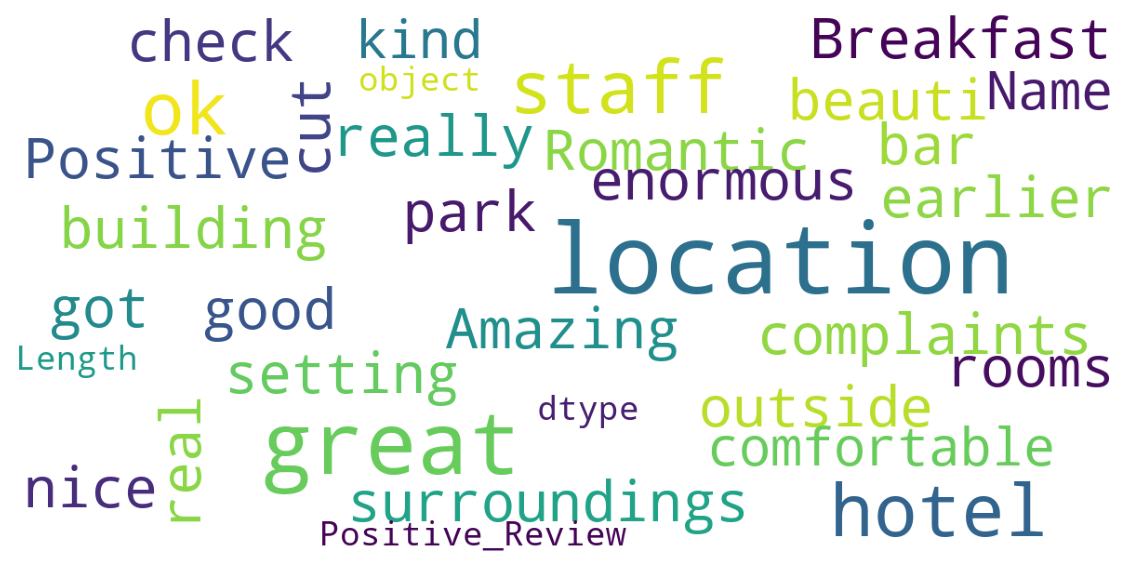

In [42]:
show_wordcloud(df["Positive_Review"])

In [43]:
# most positive slova objevujici v positive recenzich
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv.fit_transform(df['Positive_Review'])
temp1_counts = most_positive_words.sum(axis=0)
temp1_words = cv.vocabulary_
temp1_words

{'great location': 8,
 'location good': 12,
 'good location': 7,
 'friendly staff': 5,
 'good breakfast': 6,
 'walking distance': 19,
 'staff friendly': 15,
 'friendly helpful': 4,
 'helpful staff': 10,
 'staff helpful': 17,
 'helpful friendly': 9,
 'bed comfortable': 0,
 'room clean': 14,
 'staff great': 16,
 'comfortable bed': 2,
 'location great': 13,
 'value money': 18,
 'breakfast good': 1,
 'excellent location': 3,
 'location excellent': 11}

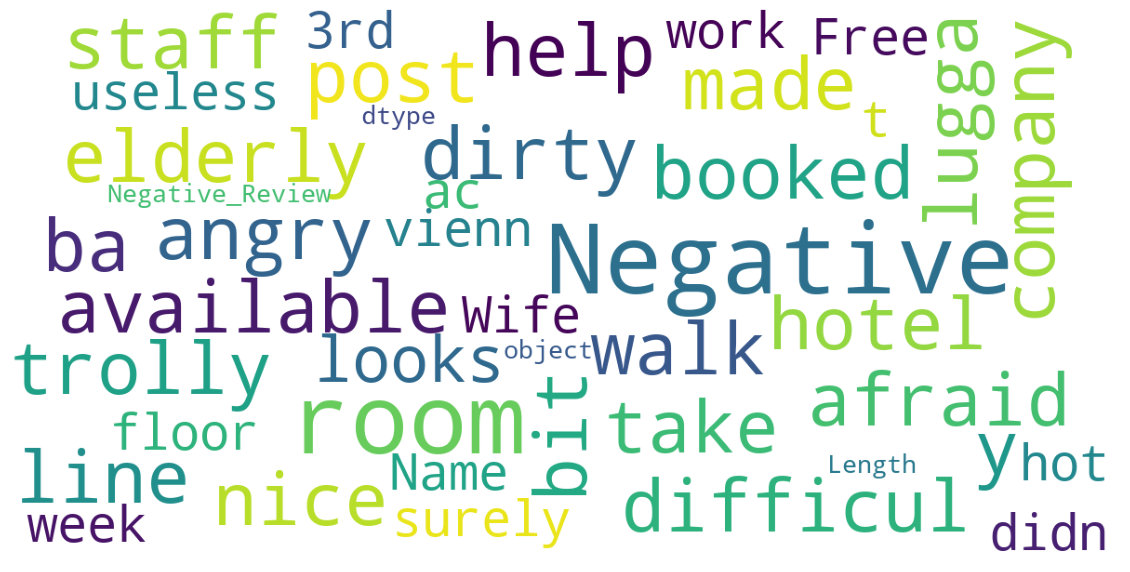

In [44]:
show_wordcloud(df["Negative_Review"])

In [45]:
# most negative slova objevujici v negativnich recenzich
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(df['Negative_Review'])
temp1_counts = most_negative_words.sum(axis=0)
temp1_words = cv.vocabulary_
temp1_words

{'booking com': 2,
 'small room': 16,
 'tea coffee': 18,
 'did work': 5,
 'breakfast included': 4,
 'didn work': 7,
 'little bit': 9,
 'room service': 13,
 'star hotel': 17,
 'mini bar': 10,
 'room small': 14,
 'room little': 12,
 'breakfast expensive': 3,
 'air conditioning': 0,
 'rooms small': 15,
 'didn like': 6,
 'double bed': 8,
 'bit small': 1,
 'room bit': 11,
 'wi fi': 19}

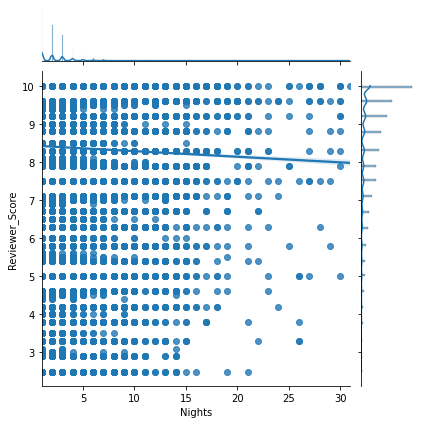

In [46]:
# extrating nights from tag
def splitString(string):
    array = string.split(" ', ' ")
    array[0] = array[0][3:]
    array[-1] = array[-1][:-3]
    if not 'trip' in array[0]:
        array.insert(0,None)
    try:
        return float(array[3].split()[1])
    except:
        return None

df["Nights"] = df["Tags"].apply(splitString)
sns.jointplot(data=df,y="Reviewer_Score",x="Nights",kind="reg")

In [59]:
#pouzite tagy
df['TypeOfFamily']= df.Tags.apply(lambda x: x.split(',')[0]) 
df['TypeOfFamily']=df.TypeOfFamily.apply(lambda x:x.split('[')[1]) 
df['TypeOfFamily']=df.TypeOfFamily.apply(lambda x: x.split("'")[1])
df['TypeOfFamily'].value_counts().sort_values(ascending=False).head(10)

 Leisure trip                   416672
 Business trip                   82748
 Couple                           5808
 Solo traveler                    4291
 Family with young children       2227
 Group                            1600
 With a pet                       1405
 Family with older children        931
 Travelers with friends             56
Name: TypeOfFamily, dtype: int64

In [60]:
##--------- Analyza entit a sentimentu u top 3 nejvíce recenzovaných--------- 

In [61]:
#Vytvoření sloupce Review
df['Review'] = df['Positive_Review'] + df['Negative_Review']
df["Review"]

0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4          Amazing location and building Romantic settin...
                                ...                        
515733     location no trolly or staff to help you take ...
515734     Breakfast was ok and we got earlier check in ...
515735    No Positive The ac was useless It was a hot we...
515736     The rooms are enormous and really comfortable...
515737     staff was very kind  I was in 3rd floor It di...
Name: Review, Length: 515738, dtype: object

In [62]:
# top 3 nejvíc hodnocených hotelů
df.Hotel_Name.describe()
Most_Rev_Count = df.Hotel_Name.value_counts()
print(Most_Rev_Count[:3])

Britannia International Hotel Canary Wharf    4789
Strand Palace Hotel                           4256
Park Plaza Westminster Bridge London          4169
Name: Hotel_Name, dtype: int64


In [63]:
#######Entity,sentiment 1. hotel - top 3 recenze

In [64]:
df_Review_Strand_Palace = df.Review[df.Hotel_Name == "Britannia International Hotel Canary Wharf"]
df_Review_Strand_Palace_Hotel = df.Review[df.Average_Score >= 9.5]

def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

text_content = df_Review_Strand_Palace_Hotel.values[0]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))
print("\n")

text_content = df_Review_Strand_Palace_Hotel.values[1]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))
print("\n")

text_content = df_Review_Strand_Palace_Hotel.values[2]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))

 Brilliant A wonderful property with excellent staff Nothing is too much trouble Incredible attention to detail regarding my preferences from previous stays VERY expensive but worth it for a really indulgent stay  Nothing that I can think of 
Název entity: property - Typ entity: OTHER - Skóre: 0.2714877128601074
Název entity: Nothing - Typ entity: OTHER - Skóre: 0.15058991312980652
Název entity: Nothing - Typ entity: OTHER - Skóre: 0.12649720907211304
Název entity: staff - Typ entity: PERSON - Skóre: 0.11194520443677902
Název entity: attention - Typ entity: OTHER - Skóre: 0.09730291366577148
Název entity: preferences - Typ entity: OTHER - Skóre: 0.08753412216901779
Název entity: detail - Typ entity: OTHER - Skóre: 0.07777947187423706
Název entity: trouble - Typ entity: OTHER - Skóre: 0.07686345279216766
Overall Sentiment: score of -0.699999988079071 with magnitude of 1.399999976158142


 Timeless elegance to this lovely hotel The staff made you feel special and on hand to help This was

In [65]:
#######Entity,sentiment 2. hotel - top 3 recenze

In [66]:
df_Review_Strand_Palace = df.Review[df.Hotel_Name == "Strand Palace Hotel"]
df_Review_Strand_Palace_Hotel = df.Review[df.Average_Score >= 9.5]

text_content = df_Review_Strand_Palace_Hotel.values[0]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))
print("\n")

text_content = df_Review_Strand_Palace_Hotel.values[1]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))
print("\n")

text_content = df_Review_Strand_Palace_Hotel.values[2]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))

 Brilliant A wonderful property with excellent staff Nothing is too much trouble Incredible attention to detail regarding my preferences from previous stays VERY expensive but worth it for a really indulgent stay  Nothing that I can think of 
Název entity: property - Typ entity: OTHER - Skóre: 0.2714877128601074
Název entity: Nothing - Typ entity: OTHER - Skóre: 0.15058991312980652
Název entity: Nothing - Typ entity: OTHER - Skóre: 0.12649720907211304
Název entity: staff - Typ entity: PERSON - Skóre: 0.11194520443677902
Název entity: attention - Typ entity: OTHER - Skóre: 0.09730291366577148
Název entity: preferences - Typ entity: OTHER - Skóre: 0.08753412216901779
Název entity: detail - Typ entity: OTHER - Skóre: 0.07777947187423706
Název entity: trouble - Typ entity: OTHER - Skóre: 0.07686345279216766
Overall Sentiment: score of -0.699999988079071 with magnitude of 1.399999976158142


 Timeless elegance to this lovely hotel The staff made you feel special and on hand to help This was

In [67]:
#######Entity,sentiment 3. hotel - top 3 recenze

In [68]:
df_Review_Strand_Palace = df.Review[df.Hotel_Name == "Park Plaza Westminster Bridge London"]
df_Review_Strand_Palace_Hotel = df.Review[df.Average_Score >= 9.5]

text_content = df_Review_Strand_Palace_Hotel.values[0]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))
print("\n")

text_content = df_Review_Strand_Palace_Hotel.values[1]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))
print("\n")

text_content = df_Review_Strand_Palace_Hotel.values[2]
print(text_content)
response = analyze_entity(text_content)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))
response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude))

 Brilliant A wonderful property with excellent staff Nothing is too much trouble Incredible attention to detail regarding my preferences from previous stays VERY expensive but worth it for a really indulgent stay  Nothing that I can think of 
Název entity: property - Typ entity: OTHER - Skóre: 0.2714877128601074
Název entity: Nothing - Typ entity: OTHER - Skóre: 0.15058991312980652
Název entity: Nothing - Typ entity: OTHER - Skóre: 0.12649720907211304
Název entity: staff - Typ entity: PERSON - Skóre: 0.11194520443677902
Název entity: attention - Typ entity: OTHER - Skóre: 0.09730291366577148
Název entity: preferences - Typ entity: OTHER - Skóre: 0.08753412216901779
Název entity: detail - Typ entity: OTHER - Skóre: 0.07777947187423706
Název entity: trouble - Typ entity: OTHER - Skóre: 0.07686345279216766
Overall Sentiment: score of -0.699999988079071 with magnitude of 1.399999976158142


 Timeless elegance to this lovely hotel The staff made you feel special and on hand to help This was

--------- spaCY sentiment --------- 

In [69]:
#analyza recenzi
df = pd.read_csv("Hotel_Reviews.csv", 
                 index_col=False, 
                 usecols=['Reviewer_Score', 'Negative_Review' , 'Positive_Review'], 
                 dtype={'Reviewer_Score':"string", 'Negative_Review':"string"})
df

Negative_Review  \
0        I am so angry that i made this post available...   
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    
515735   The ac was useless It was a hot week in vienn...   
515736                                        No Negative   
515737       I was in 3rd floor It didn t work Free Wife    

                                          Positive_Review Reviewer_Score  
0        Only the park outside of the hotel was beauti...            2.9  
1        No real complaints the hotel was great great ...            7.5  
2        Location was good and staff were ok It is cut...            7.1  
3        Great location in nice surroundings the bar a...            3.8  
4         Amazing location and building Romantic setting             6.7  
...                                                   ...            ...  
515733                                           location              7  
515734      Breakfast was ok and we got earlier check in             5.8  
515735                                        No Positive            2.5  
515736   The rooms are enormous and really comfortable...            8.8  
515737                               staff was very kind             8.3  

[515738 rows x 3 columns]

In [70]:
Reviewer_Score = df["Reviewer_Score"].str.slice(stop=1)
Reviewer_Score = Reviewer_Score.astype(int)
df["Reviewer_Score"] = Reviewer_Score
df

Negative_Review  \
0        I am so angry that i made this post available...   
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    
515735   The ac was useless It was a hot week in vienn...   
515736                                        No Negative   
515737       I was in 3rd floor It didn t work Free Wife    

                                          Positive_Review  Reviewer_Score  
0        Only the park outside of the hotel was beauti...               2  
1        No real complaints the hotel was great great ...               7  
2        Location was good and staff were ok It is cut...               7  
3        Great location in nice surroundings the bar a...               3  
4         Amazing location and building Romantic setting                6  
...                                                   ...             ...  
515733                                           location               7  
515734      Breakfast was ok and we got earlier check in                5  
515735                                        No Positive               2  
515736   The rooms are enormous and really comfortable...               8  
515737                               staff was very kind                8  

[515738 rows x 3 columns]

<AxesSubplot:xlabel='sentiment', ylabel='count'>

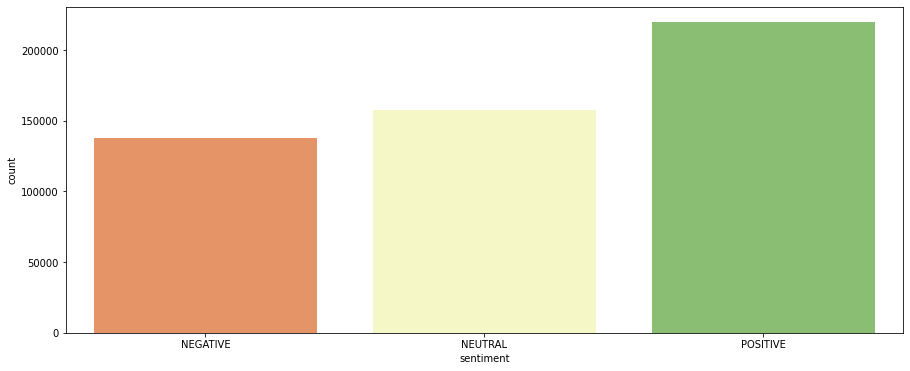

In [71]:
#Úprava dat 
df["sentiment"] = pd.cut(df["Reviewer_Score"], 
                   bins=[0,4.9,7.5,10], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.countplot(x="sentiment", data=df, palette="RdYlGn")

In [17]:
df.sentiment.dtype

CategoricalDtype(categories=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], ordered=True)

In [18]:
df.groupby("sentiment").count()

Negative_Review  Positive_Review  Reviewer_Score
sentiment                                                  
NEGATIVE            138134           138134          138134
NEUTRAL             157811           157811          157811
POSITIVE            219793           219793          219793

In [19]:
#odstranění neutralní kategorie
df[df.sentiment == "NEUTRAL"]

Negative_Review  \
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
4        You When I booked with your company on line y...   
5        Backyard of the hotel is total mess shouldn t...   
8        Even though the pictures show very clean room...   
...                                                   ...   
515727         Wifi Location No tea or coffee in the room   
515730   no free parking the room was in another build...   
515731   No parking Public parking garage is 15 Euro p...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    

                                          Positive_Review  Reviewer_Score  \
1        No real complaints the hotel was great great ...               7   
2        Location was good and staff were ok It is cut...               7   
4         Amazing location and building Romantic setting                6   
5        Good restaurant with modern design great chil...               6   
8                                             No Positive               6   
...                                                   ...             ...   
515727   Rather cheap and not to far away from the cen...               5   
515730                                         large room               6   
515731                                     Good breakfast               7   
515733                                           location               7   
515734      Breakfast was ok and we got earlier check in                5   

       sentiment  
1        NEUTRAL  
2        NEUTRAL  
4        NEUTRAL  
5        NEUTRAL  
8        NEUTRAL  
...          ...  
515727   NEUTRAL  
515730   NEUTRAL  
515731   NEUTRAL  
515733   NEUTRAL  
515734   NEUTRAL  

[157811 rows x 4 columns]

In [20]:
#odstranění všech řádků s neutrální kategorií
indicies_to_drop = df[df.sentiment == "NEUTRAL"].index

indicies_to_drop

Int64Index([     1,      2,      4,      5,      8,      9,     11,     16,
                17,     18,
            ...
            515717, 515721, 515722, 515725, 515726, 515727, 515730, 515731,
            515733, 515734],
           dtype='int64', length=157811)

In [21]:
df = df.drop(indicies_to_drop)
df.groupby("sentiment").count()

Negative_Review  Positive_Review  Reviewer_Score
sentiment                                                  
NEGATIVE            138134           138134          138134
NEUTRAL                  0                0               0
POSITIVE            219793           219793          219793

CategoricalDtype(categories=['NEGATIVE', 'POSITIVE'], ordered=True)

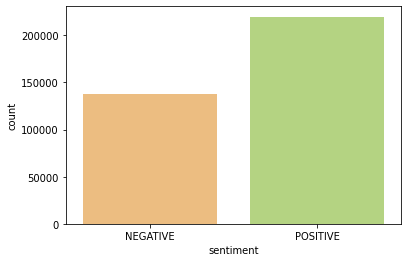

In [22]:
#zobrazeni grafu a vypís podoby kategorií
df.sentiment = df.sentiment.cat.remove_unused_categories()
sns.countplot(x="sentiment", data=df, palette="RdYlGn")
df.sentiment.dtype

In [70]:
# Vyvážení dat
df_neg = df[df.sentiment=="NEGATIVE"]
df_pos = df[df.sentiment=="POSITIVE"]

In [71]:
#definování samplu rozřazení dat
df_pos1 = df_pos.sample(500)
df_neg1 = df_neg.sample(500)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

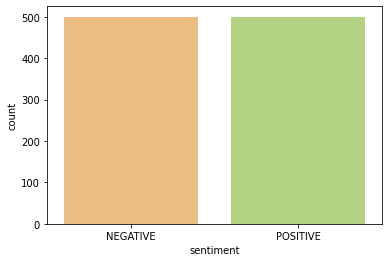

In [72]:
df = pd.concat([df_neg1, df_pos1], ignore_index=True)
sns.countplot(x="sentiment", data=df, palette="RdYlGn")

In [73]:
df['Review'] = df['Positive_Review'] + df['Negative_Review']
df["Review"]

0       our 50th wedding anniversary they gave us a f...
1              Only localization nothing moreNo Negative
2       Perfect in every way such an amazing location...
3       i was stolen in barcelona after checking out ...
4        Great bed and location next to metroNo Negative
                             ...                        
995     Well picked room the view of the city panoram...
996       Amazing staff and a great location No Negative
997     Very good location comfy rooms The staff was ...
998     We were made very welcome and also had an upg...
999               Staff and lovely terraced room Nothing
Name: Review, Length: 1000, dtype: string

In [74]:
# rozdělení na trénovací a testovací data
df = df.sample(frac=1) #shuffle, případně i procentuální subset
df

Negative_Review  \
17                                         No Negative   
44                                             Nothing   
619                                        No Negative   
577   The outside kitchen extractor fan gives low l...   
288                                        No Negative   
..                                                 ...   
313   Room cleanliness was appalling The bathroom d...   
892                              nothing I didn t like   
739                                        No Negative   
612          Cost of breakfast no choice of newspaper    
684                                        No Negative   

                                       Positive_Review  Reviewer_Score  \
17    staff really kind and gentle location just 5m...               1   
44    breakfast was very tasty the shuttle bus was ...               1   
619   The staff are genuinely friendly most helpful...               8   
577   The staff were excellent helpful and obliging...               8   
288   The best hotel i ve ever stayed in Paris Amaz...               1   
..                                                 ...             ...   
313         What did I like I can t think of anything                3   
892   lovely staff lovely breakfast lovely room gre...               9   
739                  View from room of the London eye                9   
612   Well appointed rooms friendly helpful staff V...               9   
684   Very nice hotel in quiet location near to the...               9   

    sentiment                                   cats  \
17   NEGATIVE  {'POSITIVE': False, 'NEGATIVE': True}   
44   NEGATIVE  {'POSITIVE': False, 'NEGATIVE': True}   
619  POSITIVE  {'POSITIVE': True, 'NEGATIVE': False}   
577  POSITIVE  {'POSITIVE': True, 'NEGATIVE': False}   
288  NEGATIVE  {'POSITIVE': False, 'NEGATIVE': True}   
..        ...                                    ...   
313  NEGATIVE  {'POSITIVE': False, 'NEGATIVE': True}   
892  POSITIVE  {'POSITIVE': True, 'NEGATIVE': False}   
739  POSITIVE  {'POSITIVE': True, 'NEGATIVE': False}   
612  POSITIVE  {'POSITIVE': True, 'NEGATIVE': False}   
684  POSITIVE  {'POSITIVE': True, 'NEGATIVE': False}   

                                                Review  
17    staff really kind and gentle location just 5m...  
44    breakfast was very tasty the shuttle bus was ...  
619   The staff are genuinely friendly most helpful...  
577   The staff were excellent helpful and obliging...  
288   The best hotel i ve ever stayed in Paris Amaz...  
..                                                 ...  
313   What did I like I can t think of anything  Ro...  
892   lovely staff lovely breakfast lovely room gre...  
739       View from room of the London eye No Negative  
612   Well appointed rooms friendly helpful staff V...  
684   Very nice hotel in quiet location near to the...  

[1000 rows x 6 columns]

In [75]:
#rozdělení na 80% trénovacích a 20% testovacích dat.
split = 0.8
split_row = int(len(df) * split)
split_row

800

In [76]:
#délka testovacích dat
df_test = df[split_row:]

len(df_test)

200

In [77]:
#délka trenovacích dat
df_train = df[:split_row]

len(df_train)

800

In [78]:
#formátování dat pro spaCy update a evaluate funkci
train_data = list(zip(df_train['Review'], [{"cats": cats} for cats in df_train["cats"]]))
test_data = list(zip(df_test['Review'], [{"cats": cats} for cats in df_test["cats"]]))

train_data[:10]

[(' staff really kind and gentle location just 5minutes to buckingham palaceNo Negative',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}),
 (' breakfast was very tasty the shuttle bus was convenient to the underground  Nothing',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}),
 (' The staff are genuinely friendly most helpful Their level of efficiency is excellent No Negative',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}),
 (' The staff were excellent helpful and obliging nothing was too much trouble Comfortable bed and pillows  The outside kitchen extractor fan gives low level noise which is annoying especially when traffic noise eases at night ',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}),
 (' The best hotel i ve ever stayed in Paris Amazing bed amazing shower very comfortable Very easy to get everywhere by bus and metro The breakfast is very good also No Negative',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}),
 (' very clean and comfortable hotel to stay in

In [79]:
import spacy
nlp = spacy.load("en_core_web_md")

In [81]:
textcat = nlp.create_pipe("textcat",
                          config={"exclusive_classes": True,
                                  "architecture": "simple_cnn"})
nlp.add_pipe(textcat, last=True)

textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

textcat.labels 

('POSITIVE', 'NEGATIVE')

In [82]:
from spacy.util import minibatch, compounding

In [83]:
batch_sizes = compounding(1.0, 4.0, 1.5)
for x in range(12): print(next(batch_sizes))

1.0
1.5
2.25
3.375
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0


In [84]:
batch_sizes = compounding(1.0, 4.0, 1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [(' breakfast was very tasty the shuttle bus was convenient to the underground  Nothing', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]

batch: 1 [(' The staff are genuinely friendly most helpful Their level of efficiency is excellent No Negative', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]

batch: 2 [(' The staff were excellent helpful and obliging nothing was too much trouble Comfortable bed and pillows  The outside kitchen extractor fan gives low level noise which is annoying especially when traffic noise eases at night ', {'cats': {'POSITIVE': True, 'NEGATIVE': False}}), (' The best hotel i ve ever stayed in Paris Amazing bed amazing shower very comfortable Very easy to get everywhere by bus and metro The breakfast is very good also No Negative', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]


In [85]:
n_iter = 50
dropout = 0.7

In [86]:
 # odebrání ostatních pipes
pipe_exceptions = ["textcat"] #, "trf_wordpiecer", "trf_tok2vec"
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [87]:
from sklearn import metrics # funkce pro skóring
import matplotlib.pyplot as plt # pro přístup k zobrazování grafu v iteracích
import numpy as np # numpy pro generování náhodných čísel

In [88]:
import random # pro zamíchání příklady

In [89]:
score = pd.DataFrame() # dataframe pro výsledky
print("trénink", end="") # začátek tisku průběhu na řádek

with nlp.disable_pipes(other_pipes):  # s dočasně vypnutými ostatními pipes
    
    optimizer = nlp.begin_training() # vytvoření optimalizátoru    
    
    for i in range(n_iter): # iterace přes celou tréninkovou množinu (epocha)
        print(".", end="") # tisk průběhu další iterace na řádek
        losses = {} # příprava pro ukládání informací o ztrátách        
        random.shuffle(train_data) # zamíchání tréninkovou množinou
        
        batch_sizes = compounding(8.0, 40.0, 1.2) # inicializace počtu příkladů ve várkách
        batches = minibatch(train_data, size=batch_sizes) # načtení příkladů ve várkách
        
        for batch in batches: # učení se na každé várce 
            texts, annotations = zip(*batch) # uložení polí dvojic do dvou separátních polí
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) # samotné učení
        
        with textcat.model.use_params(optimizer.averages): # s dočasnou aplikací aktualizovaného modelu
            scorer = nlp.evaluate(test_data) # evaluace modelu na testovacích datech
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i, "loss"] = losses["textcat"] # zapsání končené ztráty do tabulky
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["POSITIVE"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["POSITIVE"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["POSITIVE"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["NEGATIVE"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["NEGATIVE"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["NEGATIVE"]["f"]
            
            #alternativní skórování pomocí ROC a balíčku sklearn
            docs_generator = nlp.pipe(df_test["Review"]) # dávkové zpracování testovacích dokumentů
            docs = list(docs_generator) # načtení testovacích dokumentů do listu
            scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu
            
            # kalkulace ROC
            fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                                     y_score = scores, 
                                                     pos_label = "POSITIVE")
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i,"AUC"] = metrics.auc(fpr, tpr)
            
score #zobrazení tabulky se skóre po celém učení

trénink..................................................

loss          F         P+         R+         F+         P-  \
0   0.031479  36.480528  33.333333   5.102041   8.849558  49.729730   
1   0.031612  36.580416  40.000000   4.081633   7.407407  50.526316   
2   0.033073  44.317065  48.750000  79.591837  60.465116  50.000000   
3   0.030728  50.995100  50.000000  51.020408  50.505051  52.000000   
4   0.033780  48.100967  49.655172  73.469388  59.259259  52.727273   
5   0.031976  39.588101  49.732620  94.897959  65.263158  61.538462   
6   0.033723  46.495452  54.285714  19.387755  28.571429  52.121212   
7   0.031731  54.837415  53.508772  62.244898  57.547170  56.976744   
8   0.031369  56.183425  54.621849  66.326531  59.907834  59.259259   
9   0.032792  54.242615  54.022989  47.959184  50.810811  54.867257   
10  0.032576  49.067609  51.552795  84.693878  64.092664  61.538462   
11  0.030470  52.083333  52.112676  75.510204  61.666667  58.620690   
12  0.030098  55.929487  54.545455  61.224490  57.692308  57.777778   
13  0.030088  56.253928  56.321839  50.000000  52.972973  56.637168   
14  0.031007  57.793187  56.034483  66.326531  60.747664  60.714286   
15  0.029813  56.961265  55.555556  61.224490  58.252427  58.695652   
16  0.032080  57.932692  56.363636  63.265306  59.615385  60.000000   
17  0.030072  57.983193  56.603774  61.224490  58.823529  59.574468   
18  0.030290  56.982793  55.660377  60.204082  57.843137  58.510638   
19  0.030862  56.315433  56.179775  51.020408  53.475936  56.756757   
20  0.035313  57.413763  55.855856  63.265306  59.330144  59.550562   
21  0.029328  56.472795  55.670103  55.102041  55.384615  57.281553   
22  0.031485  58.995900  58.000000  59.183673  58.585859  60.000000   
23  0.029640  56.892231  56.521739  53.061224  54.736842  57.407407   
24  0.028479  59.855480  57.894737  67.346939  62.264151  62.790698   
25  0.028659  60.748792  58.474576  70.408163  63.888889  64.634146   
26  0.030207  61.755233  59.322034  71.428571  64.814815  65.853659   
27  0.023299  60.380150  58.407080  67.346939  62.559242  63.218391   
28  0.023002  60.475297  58.878505  64.285714  61.463415  62.365591   
29  0.022756  60.984394  59.433962  64.285714  61.764706  62.765957   
30  0.021679  60.964868  59.259259  65.306122  62.135922  63.043478   
31  0.021674  61.491336  60.000000  64.285714  62.068966  63.157895   
32  0.022656  61.965769  60.185185  66.326531  63.106796  64.130435   
33  0.026226  60.419850  58.558559  66.326531  62.200957  62.921348   
34  0.019840  60.902256  58.928571  67.346939  62.857143  63.636364   
35  0.021002  59.490885  58.095238  62.244898  60.098522  61.052632   
36  0.022490  58.498962  57.281553  60.204082  58.706468  59.793814   
37  0.022255  58.498962  57.425743  59.183673  58.291457  59.595960   
38  0.021556  57.995800  57.000000  58.163265  57.575758  59.000000   
39  0.015047  57.995800  57.000000  58.163265  57.575758  59.000000   
40  0.014986  57.995800  57.000000  58.163265  57.575758  59.000000   
41  0.017445  58.474046  57.731959  57.142857  57.435897  59.223301   
42  0.018199  59.983994  59.183673  59.183673  59.183673  60.784314   
43  0.017073  59.983994  59.183673  59.183673  59.183673  60.784314   
44  0.019349  60.491110  59.595960  60.204082  59.898477  61.386139   
45  0.012381  60.984394  60.204082  60.204082  60.204082  61.764706   
46  0.016159  60.996100  60.000000  61.224490  60.606061  62.000000   
47  0.024725  60.996100  60.000000  61.224490  60.606061  62.000000   
48  0.019631  60.984394  60.204082  60.204082  60.204082  61.764706   
49  0.012190  60.451553  60.000000  58.163265  59.067358  60.952381   

           R-         F-       AUC  
0   90.196078  64.111498  0.498599  
1   94.117647  65.753425  0.441677  
2   19.607843  28.169014  0.455482  
3   50.980392  51.485149  0.505002  
4   28.431373  36.942675  0.516507  
5    7.843137  13.913043  0.549920  
6   84.313725  64.419476  0.592037  
7   48.039216  52.127660  0.590136  
8   47.058824  52.459016  0.598539  
9   60.784314  5

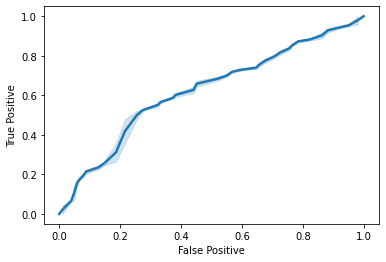

In [90]:
#alternativní skórování pomocí ROC a balíčku sklearn
docs_generator = nlp.pipe(df_test["Review"]) # dávkové zpracování testovacích dokumentů
docs = list(docs_generator) # načtení testovacích dokumentů do listu
scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu

# kalkulace ROC
fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                         y_score = scores, 
                                         pos_label = "POSITIVE")

# zobrazení ROC grafu
roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
roc_plot.set(xlabel='False Positive', ylabel='True Positive')
plt.show() # zobrazení křivky za běhu buňky